In [1]:
# Core DS libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import mytk # My Toolkit
import wrangle # Helper functions

In [2]:
pd.options.display.max_columns = None
df, _, __ = wrangle.get_potatoes()
df['custom_1'] = df.attribute_2+df.attribute_3

In [3]:
df.attribute_0.value_counts(), df.attribute_1.value_counts()

(material_7    12731
 material_5     3211
 Name: attribute_0, dtype: int64,
 material_8    6472
 material_5    6278
 material_6    3192
 Name: attribute_1, dtype: int64)

In [4]:
df['temp_1'] = df.product_code +'|'+ df.attribute_0 +'|'+ df.attribute_1
df.temp_1.value_counts()

C|material_7|material_8    3400
B|material_5|material_5    3211
E|material_7|material_6    3192
A|material_7|material_8    3072
D|material_7|material_5    3067
Name: temp_1, dtype: int64

In [5]:
df['mat5'] = 0
df['mat6'] = 0
df['mat7'] = 0
df['mat8'] = 0

df.loc[df.attribute_0 == 'material_5', 'mat5'] = 1
df.loc[df.attribute_1 == 'material_5', 'mat5'] = 1
df.loc[df.attribute_0 == 'material_6', 'mat6'] = 1
df.loc[df.attribute_1 == 'material_6', 'mat6'] = 1
df.loc[df.attribute_0 == 'material_7', 'mat7'] = 1
df.loc[df.attribute_1 == 'material_7', 'mat7'] = 1
df.loc[df.attribute_0 == 'material_8', 'mat8'] = 1
df.loc[df.attribute_1 == 'material_8', 'mat8'] = 1

In [6]:
df.temp_1.value_counts(), df.mat5.value_counts()

(C|material_7|material_8    3400
 B|material_5|material_5    3211
 E|material_7|material_6    3192
 A|material_7|material_8    3072
 D|material_7|material_5    3067
 Name: temp_1, dtype: int64,
 0    9664
 1    6278
 Name: mat5, dtype: int64)

In [7]:
cols = ['mat5',
    'mat6',
    'mat7',
    'mat8',
    'failure']

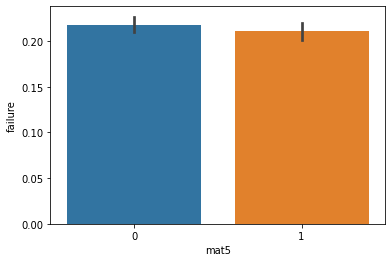

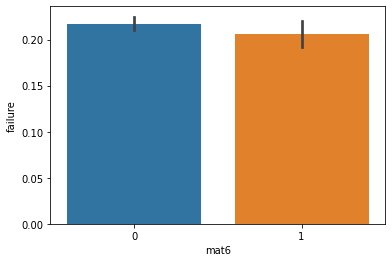

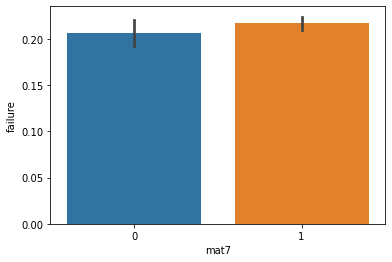

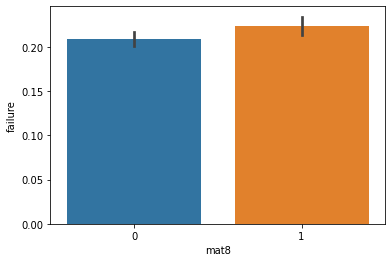

In [8]:
sns.barplot(data=df[cols], x='mat5', y='failure')
plt.show()
sns.barplot(data=df[cols], x='mat6', y='failure')
plt.show()
sns.barplot(data=df[cols], x='mat7', y='failure')
plt.show()
sns.barplot(data=df[cols], x='mat8', y='failure')
plt.show()

<AxesSubplot:xlabel='product_code', ylabel='failure'>

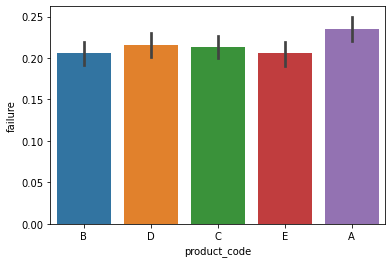

In [9]:
sns.barplot(data=df, x='product_code', y='failure')

<AxesSubplot:xlabel='custom_1', ylabel='failure'>

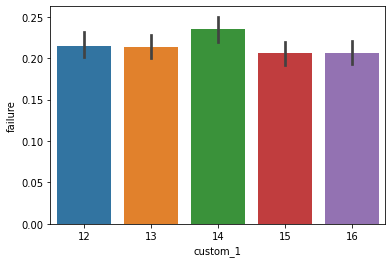

In [10]:
sns.barplot(data=df, x='custom_1', y='failure')

## Resampling

In [11]:
def upsample_target(df, target, val):
    from sklearn.utils import resample
    # Upsample the dfing data to balance a class imbalance
    minority_upsample = resample( df[df[target] == val],   #DF of samples to replicate
                                replace = True,         #Implements resampling with replacement, Default=True
                                n_samples = len(df[df[target]!=val]), #Number of samples to produce
                                random_state= 8         #Random State seed for reproducibility
                                )
    #Then glue the upsample to the original
    return pd.concat([minority_upsample, df[df[target]!=val]])

In [12]:
xf = upsample_target(df, 'failure', 1)
xf.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,custom_1,temp_1,mat5,mat6,mat7,mat8
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13066,C,134.76,material_7,material_8,5,8,12,11,4,18.909,10.841,17.044,15.553,12.799,20.285,11.544,15.398,17.186,12.737,14.804,14.570,14.294,16.296,845.750,1,13,C|material_7|material_8,0,0,1,1
22151,E,115.61,material_7,material_6,6,9,3,4,7,19.015,12.846,15.105,18.003,12.499,18.496,10.796,15.698,22.367,15.063,NaN,14.592,17.917,18.214,618.263,1,15,E|material_7|material_6,0,1,1,0
14660,C,NaN,material_7,material_8,5,8,11,12,4,18.216,11.448,16.742,17.055,13.953,17.946,11.697,17.421,20.305,10.979,15.967,14.799,14.137,16.216,681.360,1,13,C|material_7|material_8,0,0,1,1
69,A,197.46,material_7,material_8,9,5,13,1,9,19.446,12.972,17.408,19.551,11.970,18.505,10.250,15.944,18.628,13.395,14.995,15.386,15.576,16.995,755.809,1,14,A|material_7|material_8,0,0,1,1
5901,B,141.33,material_5,material_5,8,8,3,5,15,18.322,10.284,17.098,18.193,12.050,17.375,12.632,15.399,13.797,10.128,18.110,17.677,15.289,14.387,705.238,1,16,B|material_5|material_5,1,0,0,0


In [13]:
df.shape, xf.shape

((15942, 31), (25028, 31))

<AxesSubplot:xlabel='custom_1', ylabel='failure'>

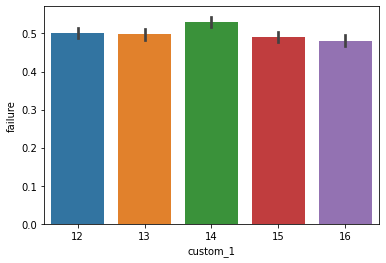

In [14]:
sns.barplot(data=xf, x='custom_1', y='failure')

In [15]:
df['temp2'] = df[[col for col in df if col.startswith('measure')]].sum(axis=1)

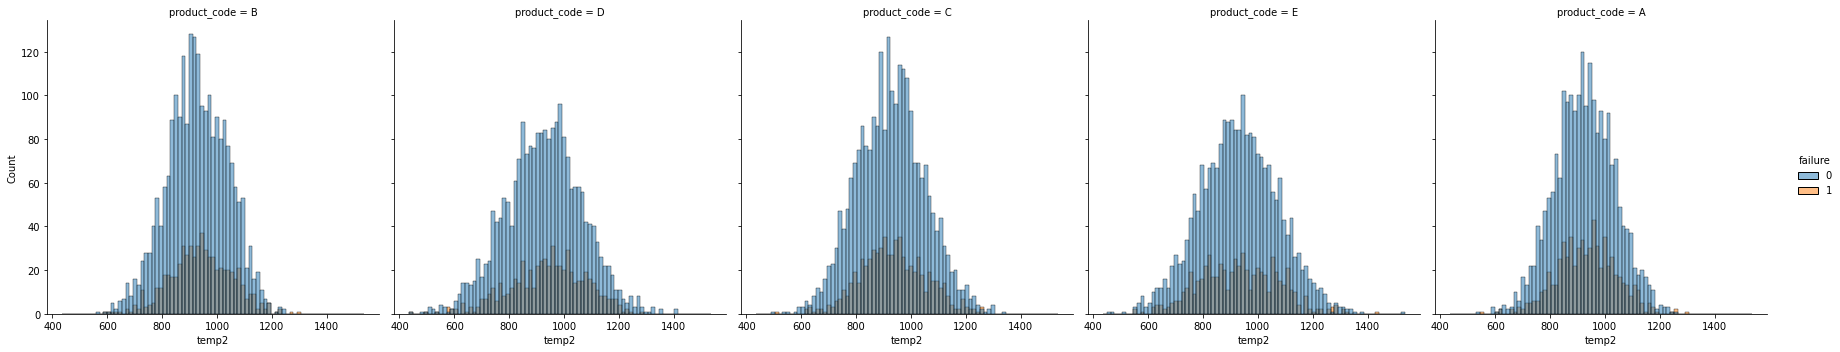

In [16]:
sns.displot(data=df[df['temp2'] > 400], x='temp2', hue='failure', col='product_code')

In [17]:
xf = xf.reset_index()


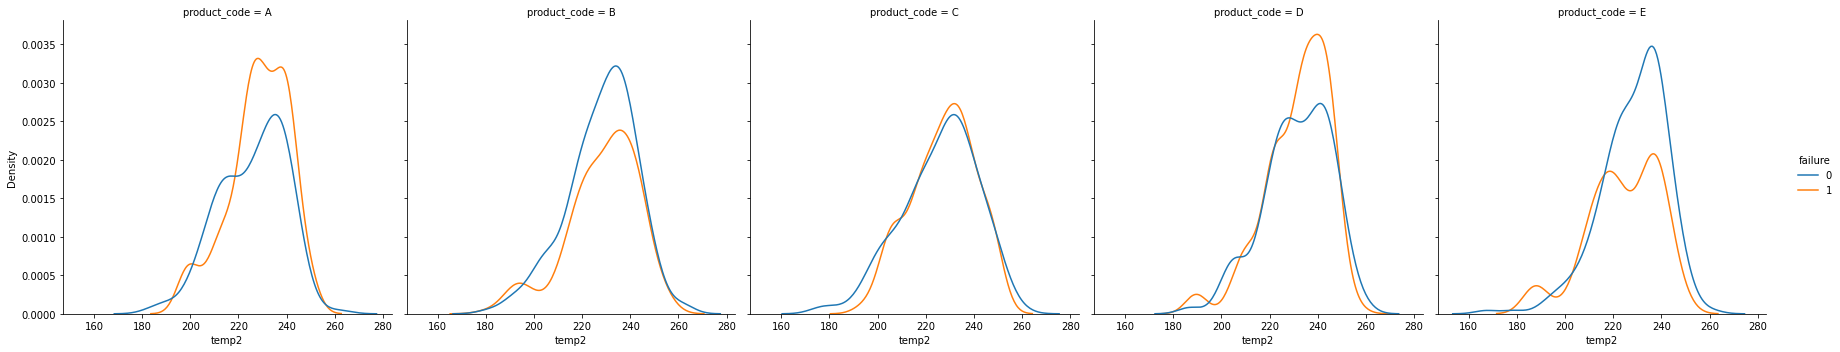

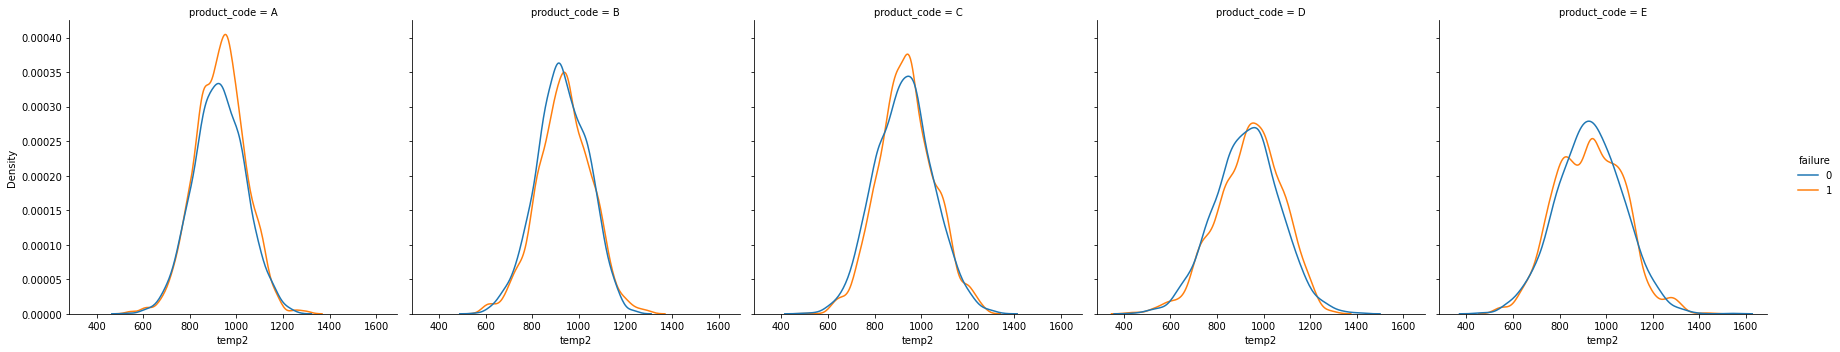

In [18]:
xf['temp2'] = xf[[col for col in xf if col.startswith('measure')]].sum(axis=1)

sns.displot(data=xf[xf['temp2'] < 400].sort_values('product_code'), x='temp2', hue='failure', col='product_code', kind='kde')
sns.displot(data=xf[xf['temp2'] > 400].sort_values('product_code'), x='temp2', hue='failure', col='product_code', kind='kde')

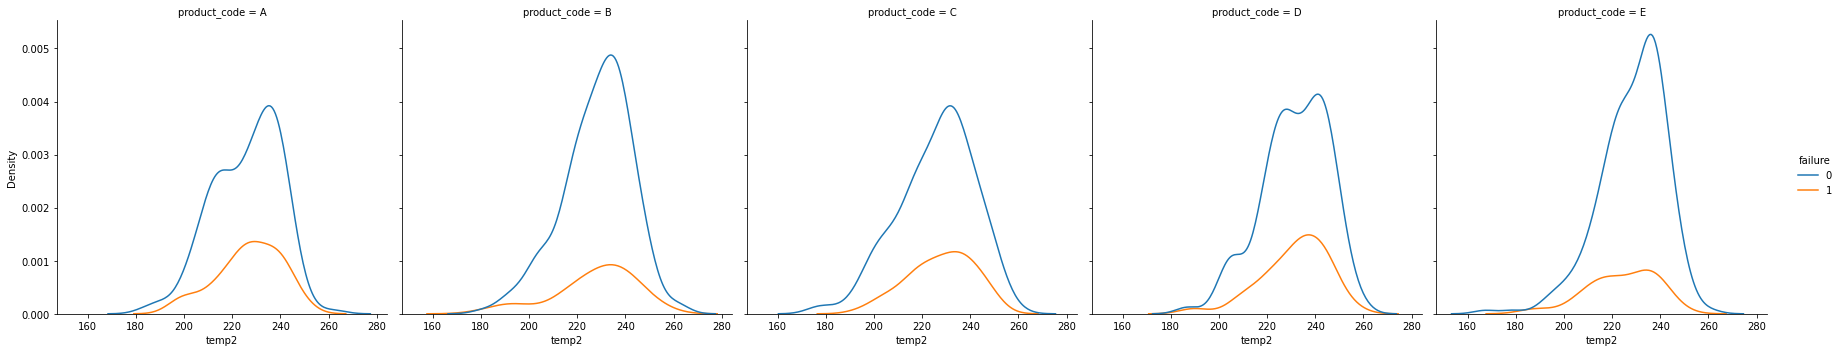

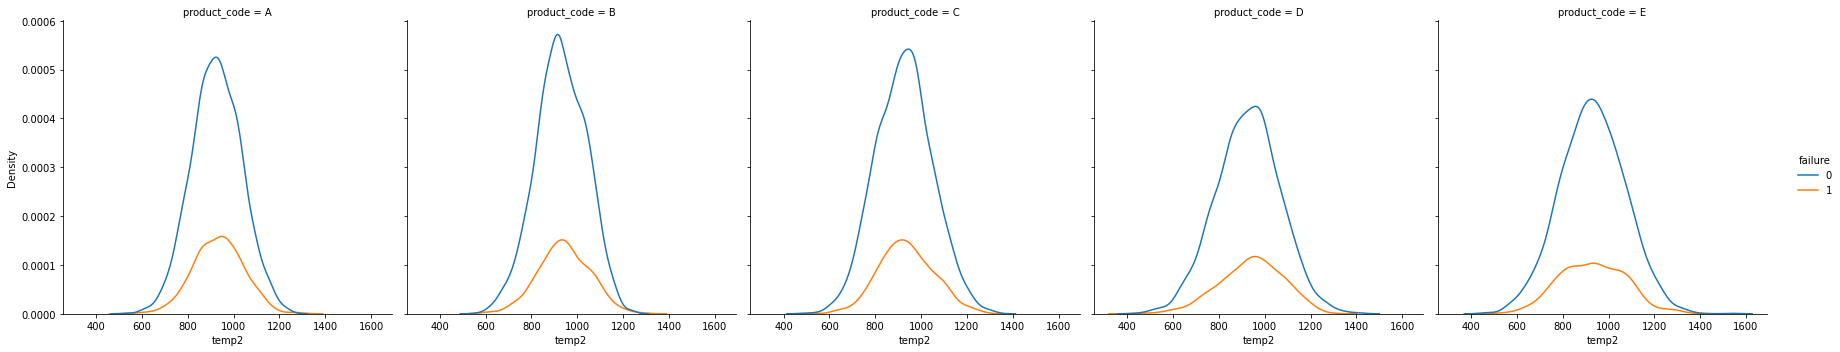

In [19]:
sns.displot(data=df[df['temp2'] < 400].sort_values('product_code'), x='temp2', hue='failure', col='product_code', kind='kde')
sns.displot(data=df[df['temp2'] > 400].sort_values('product_code'), x='temp2', hue='failure', col='product_code', kind='kde')

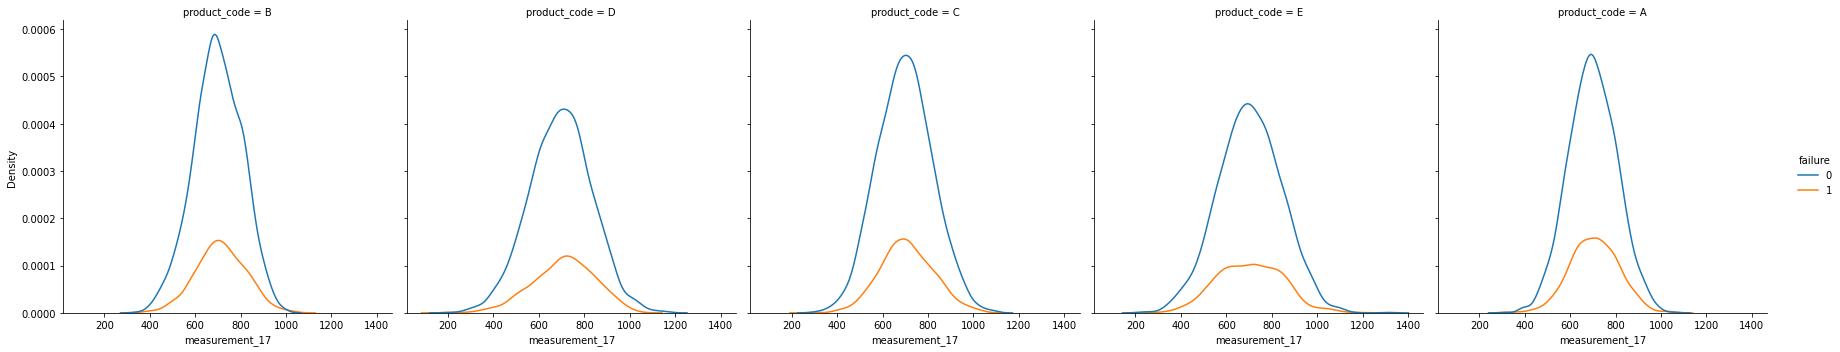

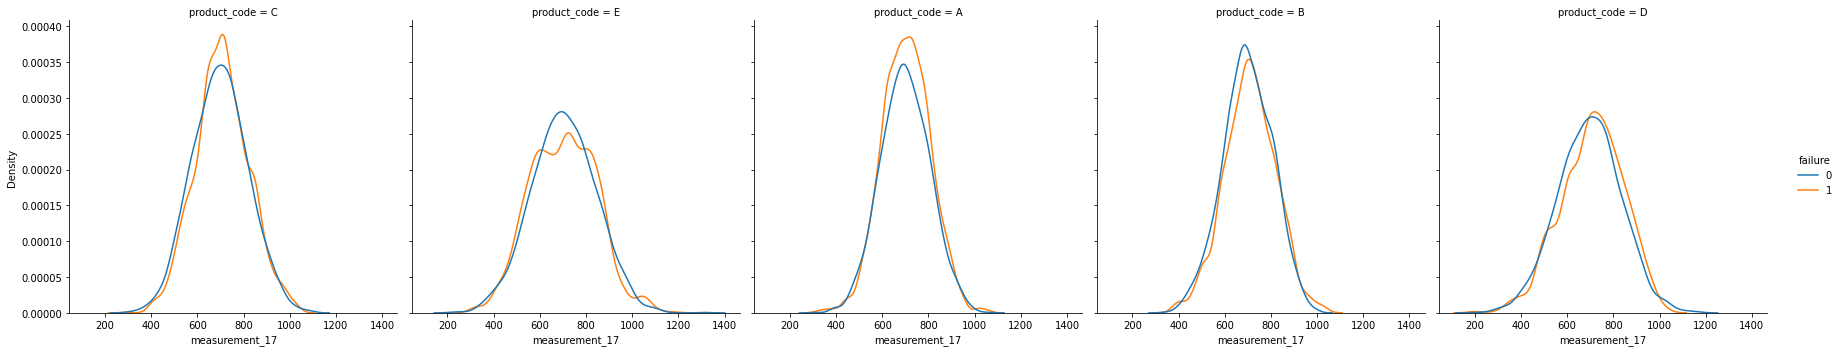

In [20]:
sns.displot(data=df, x='measurement_17', hue='failure', col='product_code', kind='kde')
sns.displot(data=xf, x='measurement_17', hue='failure', col='product_code', kind='kde')

In [21]:
# for c in [col for col in df if col.startswith('measure')]:
#     sns.displot(data=df, x=c, hue='failure', col='product_code', kind='kde')
#     sns.displot(data=xf, x=c, hue='failure', col='product_code', kind='kde')

In [22]:
df.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,custom_1,temp_1,mat5,mat6,mat7,mat8,temp2
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7247,B,73.12,material_5,material_5,8,8,6,1,10,16.467,12.130,18.070,19.563,11.549,17.350,12.357,NaN,20.876,NaN,14.307,NaN,12.942,18.828,737.604,0,16,B|material_5|material_5,1,0,0,0,929.043
20253,D,167.22,material_7,material_5,6,6,12,8,8,17.402,11.803,16.388,18.950,11.924,18.359,11.334,16.440,17.690,10.616,17.355,16.425,15.103,15.160,751.090,0,12,D|material_7|material_5,1,0,1,0,994.039
20358,D,166.50,material_7,material_5,6,6,11,10,9,16.321,9.799,18.257,16.690,NaN,18.760,12.806,17.390,20.587,13.499,14.946,17.743,NaN,17.275,694.091,0,12,D|material_7|material_5,1,0,1,0,918.164
15310,C,177.29,material_7,material_8,5,8,8,4,4,19.547,10.832,18.168,17.317,12.735,20.279,12.263,17.425,20.427,12.392,15.743,13.715,16.977,19.398,941.561,0,13,C|material_7|material_8,0,0,1,1,1184.779
11768,C,103.95,material_7,material_8,5,8,7,5,14,18.444,10.492,17.303,16.900,10.363,19.551,9.964,15.905,18.198,11.216,16.159,17.024,13.914,15.267,644.300,0,13,C|material_7|material_8,0,0,1,1,881.000


In [23]:
prod = {}
for code in df.product_code.unique().tolist():
    prod[code] =  df[df.product_code == code].copy()

<AxesSubplot:xlabel='measurement_8', ylabel='measurement_17'>

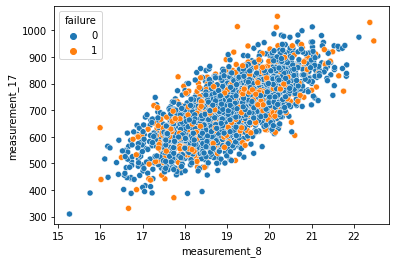

In [24]:
sns.scatterplot(data=prod['A'], x='measurement_8', y='measurement_17', hue='failure')

In [25]:
import json
class CustomJSONizer(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.bool_):
            return super().encode(bool(obj))
        
        elif isinstance(obj, np.ndarray):
            return super().encode(str(obj))
        
        elif isinstance(obj, pd.DataFrame):
            return super().encode(obj.to_dict())

        else:
            return super().default(obj)

def prettify(obj):
    return json.dumps(obj, cls=CustomJSONizer, indent=2) 

gotchas = mytk.get_gotchas(df)
gotchas

override_cat = gotchas['probable_categories']
override_cat

['product_code',
 'attribute_0',
 'attribute_1',
 'attribute_2',
 'attribute_3',
 'failure',
 'custom_1',
 'temp_1',
 'mat5',
 'mat6',
 'mat7',
 'mat8']

In [26]:
def pop_unrejected(results):
    for column, tests in results.items():
        for test, targets in tests.items():
            to_pop = []
            for target, result in targets.items():
                if result['reject'] == False:
                    to_pop.append(target)
            for target in to_pop:
                del targets[target]
    return results

In [27]:
df = df.drop(columns=['temp2'])


In [31]:
prod = {}
for code in df.product_code.unique().tolist():
    prod[code] =  df[df.product_code == code].copy()

In [51]:
results = mytk.all_the_stats(df, override_categorical=override_cat)



In [52]:
pop_unrejected(results)['failure']

{'chi2': {'product_code': {'reject': True,
   'h0': 'The two samples are independent.',
   'stat_name': 'Chi2',
   'stat': 10.064933483868586,
   'p_value': 0.03934797618467425,
   'alpha': 0.05},
  'temp_1': {'reject': True,
   'h0': 'The two samples are independent.',
   'stat_name': 'Chi2',
   'stat': 10.064933483868586,
   'p_value': 0.03934797618467425,
   'alpha': 0.05},
  'attribute_2': {'reject': True,
   'h0': 'The two samples are independent.',
   'stat_name': 'Chi2',
   'stat': 9.251887369081732,
   'p_value': 0.026122760097579713,
   'alpha': 0.05},
  'attribute_3': {'reject': True,
   'h0': 'The two samples are independent.',
   'stat_name': 'Chi2',
   'stat': 9.53700084693762,
   'p_value': 0.022940973997714848,
   'alpha': 0.05},
  'custom_1': {'reject': True,
   'h0': 'The two samples are independent.',
   'stat_name': 'Chi2',
   'stat': 10.064933483868588,
   'p_value': 0.039347976184674206,
   'alpha': 0.05},
  'mat8': {'reject': True,
   'h0': 'The two samples are in

In [53]:
print(prettify(pop_unrejected(results)['failure']))

{
  "chi2": {
    "product_code": {
      "reject": "true",
      "h0": "The two samples are independent.",
      "stat_name": "Chi2",
      "stat": 10.064933483868586,
      "p_value": 0.03934797618467425,
      "alpha": 0.05
    },
    "temp_1": {
      "reject": "true",
      "h0": "The two samples are independent.",
      "stat_name": "Chi2",
      "stat": 10.064933483868586,
      "p_value": 0.03934797618467425,
      "alpha": 0.05
    },
    "attribute_2": {
      "reject": "true",
      "h0": "The two samples are independent.",
      "stat_name": "Chi2",
      "stat": 9.251887369081732,
      "p_value": 0.026122760097579713,
      "alpha": 0.05
    },
    "attribute_3": {
      "reject": "true",
      "h0": "The two samples are independent.",
      "stat_name": "Chi2",
      "stat": 9.53700084693762,
      "p_value": 0.022940973997714848,
      "alpha": 0.05
    },
    "custom_1": {
      "reject": "true",
      "h0": "The two samples are independent.",
      "stat_name": "Chi2"

In [57]:
def failure_stats_for_each_prod(df):
    prod = {}
    for code in df.product_code.unique().tolist():
        prod[code] =  df[df.product_code == code].copy()
    results = {}
    for k, v in prod.items():
        results[k] = mytk.pop_unrejected(mytk.all_the_stats(v, override_categorical=override_cat))['failure']

    print(mytk.prettify(results))


In [59]:
df['custom_2'] = df['measurement_2'] + df['measurement_8']
failure_stats_for_each_prod(df)

{
  "B": {
    "chi2": {},
    "anova": {
      "measurement_1": {
        "reject": "true",
        "h0": "There is no variance in measurement_1 between subsets of failure",
        "stat_name": "F",
        "stat": 4.218025012011149,
        "p_value": 0.040077547238429795,
        "alpha": 0.05,
        "ttest": {
          "0": {
            "reject": "false",
            "h0": "The mean of measurement_1 for failure:0 is the same as the overall population",
            "stat_name": "F",
            "stat": 0.9316139542177524,
            "p_value": 0.35162436440268685,
            "alpha": 0.05
          },
          "1": {
            "reject": "false",
            "h0": "The mean of measurement_1 for failure:1 is the same as the overall population",
            "stat_name": "F",
            "stat": -1.8418932804336616,
            "p_value": 0.06593787780357366,
            "alpha": 0.05
          }
        }
      },
      "measurement_2": {
        "reject": "true",
        "h0

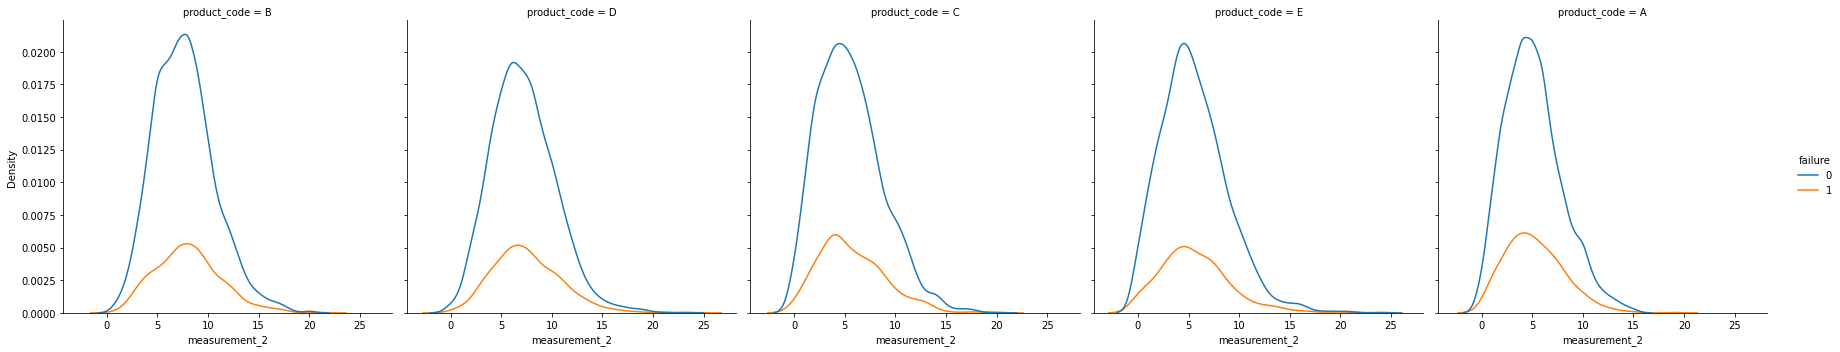

In [50]:
sns.displot(data=df, x='measurement_2', col='product_code', hue='failure', kind='kde')

<AxesSubplot:xlabel='product_code', ylabel='mat8'>

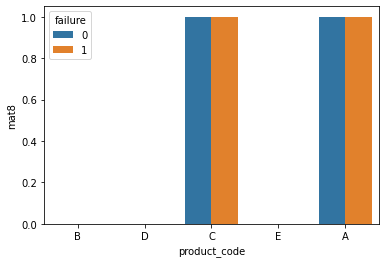

In [55]:
sns.barplot(data=df, x='product_code', y='mat8', hue='failure')

In [83]:
failure_stats_for_each_prod(df)

{
  "B": {
    "chi2": {},
    "anova": {
      "measurement_1": {
        "reject": "true",
        "h0": "There is no variance in measurement_1 between subsets of failure",
        "stat_name": "F",
        "stat": 4.218025012011149,
        "p_value": 0.040077547238429795,
        "alpha": 0.05,
        "ttest": {
          "0": {
            "reject": "false",
            "h0": "The mean of measurement_1 for failure:0 is the same as the overall population",
            "stat_name": "F",
            "stat": 0.9316139542177524,
            "p_value": 0.35162436440268685,
            "alpha": 0.05
          },
          "1": {
            "reject": "false",
            "h0": "The mean of measurement_1 for failure:1 is the same as the overall population",
            "stat_name": "F",
            "stat": -1.8418932804336616,
            "p_value": 0.06593787780357366,
            "alpha": 0.05
          }
        }
      },
      "measurement_2": {
        "reject": "true",
        "h0

<AxesSubplot:xlabel='measurement_2', ylabel='failure'>

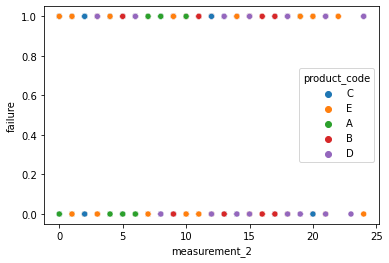

In [63]:
sns.scatterplot(data=xf, x='measurement_2', y='failure', hue='product_code')


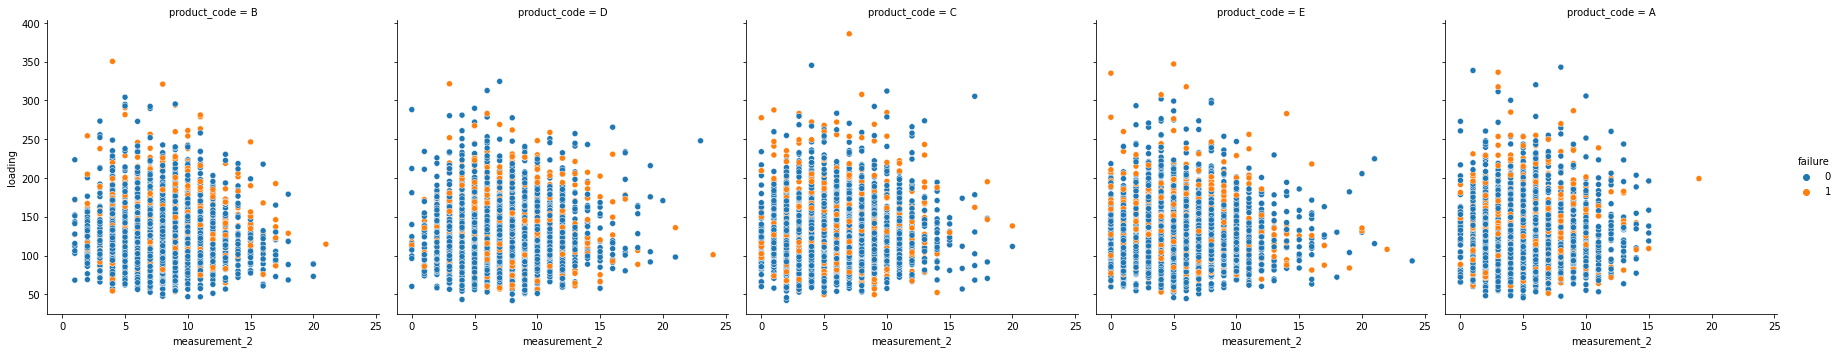

In [66]:
sns.relplot(data=df, x='measurement_2', y='loading', col='product_code', hue='failure')


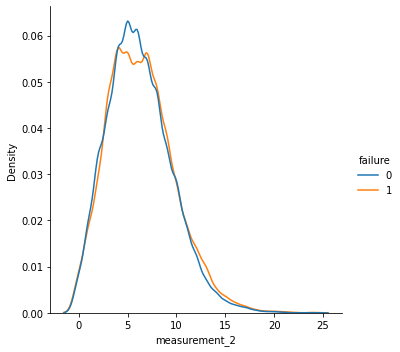

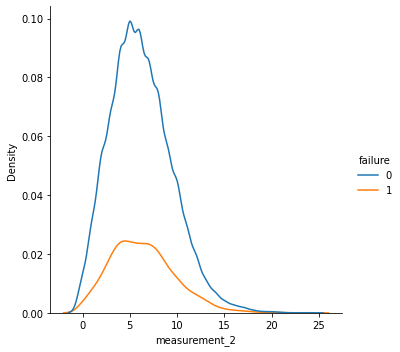

In [82]:
sns.displot(kind='kde', data=xf, x='measurement_2', hue='failure')
sns.displot(kind='kde', data=df, x='measurement_2', hue='failure')